In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import cauchy
import random
import astropy as ast
import astropy.units as u
from astropy.coordinates import SkyCoord

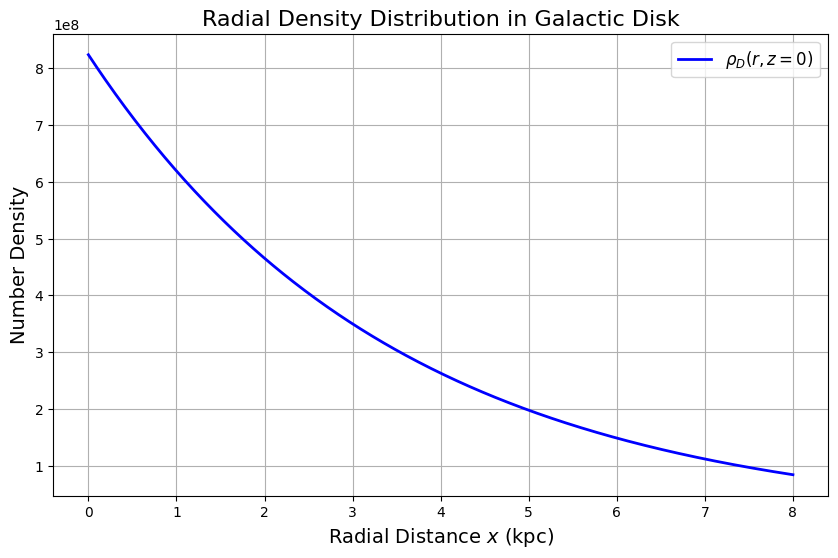

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def n_Disk(r):
# Constants
  R_sun = 8.3
  R = 3.5
  H = 325
  Sigma = 50

  # Calculate density for z = 0
  n_D = (Sigma / (2 * H)) * np.exp(-(r - R_sun) / R) *10**9
  return n_D

# Define the radial range
r = np.linspace(0, 8, 500)  # Radial distances in kpc

# Plot
plt.figure(figsize=(10, 6))
plt.plot(r, n_Disk(r) , label=r'$\rho_D(r, z=0)$', color='blue', linewidth=2)

# Labels and title
plt.xlabel(r'Radial Distance $x$ (kpc)', fontsize=14)
plt.ylabel(r'Number Density', fontsize=14)
plt.title('Radial Density Distribution in Galactic Disk', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

# Show plot
plt.show()


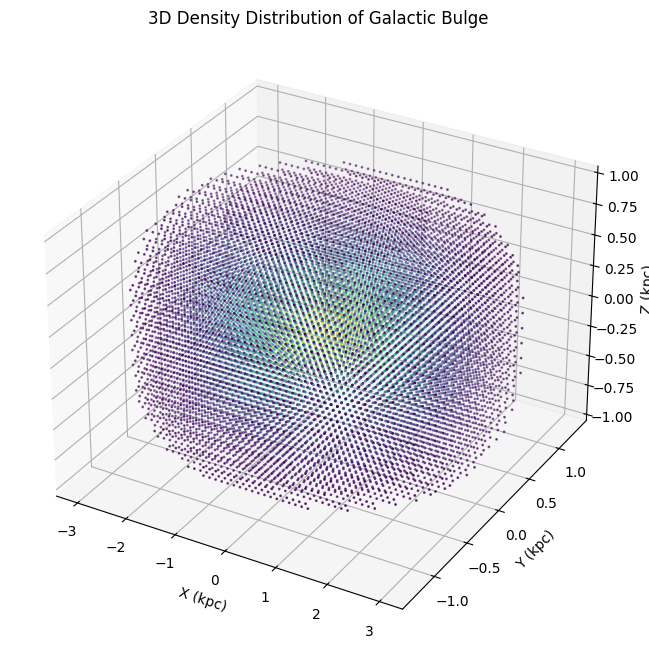

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def n_Bulge_3d(x,y,z):

  a, b, c = 1.49, 0.58, 0.40  # Scale lengths in kpc
  M_B = 1.1e10

  r = (((X / a)**2 + (Y / b)**2)**2 + (Z / c)**4) ** 0.25
  n_B = (M_B / (6.57 * np.pi * a * b * c * 10 ** 9)) * np.exp(-r**2 / 2)

  return n_B

def n_Bulge(x):

  a, b, c = 1.49, 0.58, 0.40  # Scale lengths in kpc
  M_B = 1.1e10

  n_B = (M_B / (6.57 * np.pi * a * b * c )) * np.exp(-x**2 / 2)

  return n_B

# Compute r^4 and density

# Create a grid of coordinates
x = np.linspace(-3, 3, 50)  # X-coordinates in kpc
y = np.linspace(-3, 3, 50)  # Y-coordinates in kpc
z = np.linspace(-3, 3, 50)  # Z-coordinates in kpc

X, Y, Z = np.meshgrid(x, y, z)

# Normalize density for better visualization
#n_B /= np.max(n_B)

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points where density is significant
threshold = 0.1  # Only plot regions with significant density
indices = np.where(n_Bulge_3d(X,Y,Z) > threshold)

ax.scatter(X[indices], Y[indices], Z[indices], c=n_Bulge_3d(X,Y,Z)[indices] , cmap='viridis', s=1)
#n_B[indices]
# Labels and title
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('Z (kpc)')
ax.set_title('3D Density Distribution of Galactic Bulge')

plt.show()


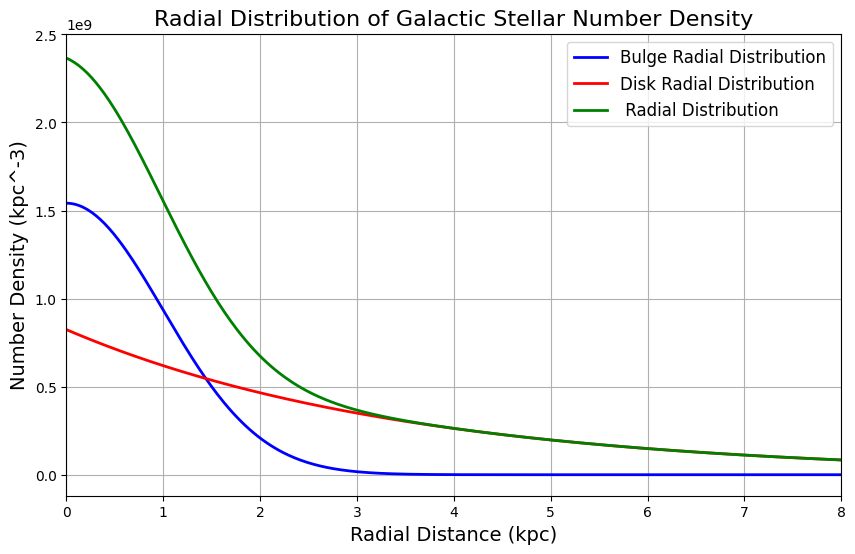

In [8]:

# Define the radial range
x = np.linspace(-3, 8, 500)
y = np.linspace(0, 8, 500)
z = np.linspace(0, 8, 500)

#r = (((x / a)**2 + (y / b)**2)**2 + (z / c)**4) ** 0.25

#def n_Disk(x):
# Constants
  # Calculate density for z = 0

  #n = (Sigma / (2000 * H)) * np.exp(-(x - R_sun) / R) *10**9

  #return n

# Density function
#def n_Bulge(r):

    #n = (M_B / (6.57 * np.pi * a * b * c)) * np.exp(-(r**2) / 2)
    #return n

# Compute radial density
n = n_Bulge(x) + n_Disk(x)

# Plot radial distribution
plt.figure(figsize=(10, 6))
plt.plot(x, n_Bulge(x), label='Bulge Radial Distribution', color='blue', linewidth=2)
plt.plot(x, n_Disk(x), label='Disk Radial Distribution', color='red', linewidth=2)
plt.plot(x, n, label=' Radial Distribution', color='green', linewidth=2)
plt.xlabel('Radial Distance (kpc)', fontsize=14)
plt.ylabel('Number Density (kpc^-3)', fontsize=14)
plt.title('Radial Distribution of Galactic Stellar Number Density', fontsize=16)
ax = plt.gca()
ax.set_xlim([0, 8])
plt.grid(True)

plt.legend(fontsize=12)
plt.show()


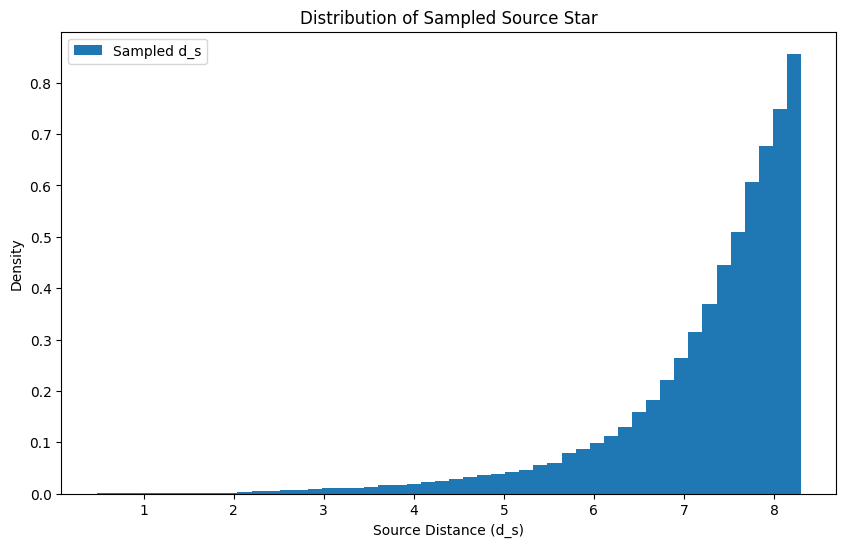

In [9]:
# Define the radial range
x = np.linspace(0, 8, 500)

# Calculate r
#r = (((x / a)**2 + (x / b)**2)**2 + (x / c)**4) ** 0.25
#r = (((x / a)**2 + (x / b)**2)**2 + (x / c)**4) ** 0.25

# Bulge density function
#def n_Bulge(x):
#    return (M_B / (6.57 * np.pi * a * b * c)) * np.exp(-(r**2) / 2)

# Total density function
def n(x):
    #r = (((x / a)**2 + (x / b)**2)**2 + (x / c)**4)**0.25
    return n_Bulge(x) + n_Disk(x)

# Distribution function dN/dd_s
def dN_dd_s(d_s):
    x = 8.5 - d_s
    return n(x) * d_s**2

# Sampling function using inverse transform sampling
def sample_star():
    # Define d_s range
    d_s_values = np.linspace(0.1, 8.3, 1000)  # Avoid d_s = 0 to prevent division by zero
    dN_values = dN_dd_s(d_s_values)

    # Normalize the distribution
    dN_values /= np.sum(dN_values)

    # Cumulative distribution function (CDF)
    cdf = np.cumsum(dN_values)

    # Generate a random value for inverse sampling
    random_value = np.random.random()

    # Find the corresponding d_s from the CDF
    selected_d_s = d_s_values[np.searchsorted(cdf, random_value)]
    return selected_d_s

# Generate 1000 random samples
sampled_d_s = [sample_star() for _ in range(100000)]

# Plot the distribution of sampled d_s
plt.figure(figsize=(10, 6))
plt.hist(sampled_d_s, bins=50, density=True, label='Sampled d_s')
plt.xlabel('Source Distance (d_s)')
plt.ylabel('Density')
plt.title('Distribution of Sampled Source Star')
plt.legend()
plt.show()


In [10]:
b_0 = 0.9250245
l_0 = 0.4363323
V_E_d = 16.5 * np. array([-1* np.cos(b_0)*np.cos(l_0) , np.cos(b_0)*np.sin(l_0) , np.sin(b_0) ])
V_E_d

array([-8.99958919,  4.19657722, 13.17748588])

In [11]:

V_E_m = np.array([0 , 220 , 0]) # LSR velocity
#V_E_d = np.array([-11.1 , 12.24 , 7.25])

b_0 = 0.9250245
l_0 = 0.4363323
V_E_d = 16.5 * np. array([0 , np.cos(b_0)*np.sin(l_0) , np.sin(b_0) ])
V_E = V_E_m + V_E_d

#####################

def V_D (r) :
  V_C_R0 = 239 #km_s-1
  R_0 = 8.3 #kpc
  Beta = 0.01

  #V_r = V_C_R0 * (Radius / R_0)** Beta
  V_r = V_C_R0* ((1.00767 * (r / R_0)** 0.0394) + 0.00712 )

  V = np.array([ 0 ,  np.random.normal(V_r, 20.8) , np.random.normal(16.3, 20.8)  ])
  return V

def V_D_d ():
  import random
  num_samples = 1
  u = np.random.uniform(0, 1, num_samples)
  ############################## r
  #mu_r = 37.61
  mu_r = 27.4
  #S_r = 0.07
  S_r = 1.1
  V_d_r = np.random.normal(mu_r, S_r) * random.choice([-1, 1])
  ############################## theta
  #mu_t = 25.01
  mu_t = 20.8
  #S_t = 0.04
  S_t = 1.2
  V_d_t = np.random.normal(mu_t, S_t) * random.choice([-1, 1])
  ############################# Z
  #mu_z = 18.53
  mu_z = 16.3
  #S_z = 0.03
  S_z = 2.2
  V_d_z = np.random.normal(mu_z, S_z) * random.choice([-1, 1])

  return np.array([V_d_r , V_d_t , V_d_z])

def V_B (r) :

  mean_velocity = 39 * r  # km/s
  velocity_dispersion = 110  # km/s
  #num_samples = 1000

  # Generate random velocities

  V_B = np.random.normal(mean_velocity, 110)

  return np.array([0 , np.random.normal(mean_velocity, 110/3) , np.random.normal(0, 110/3)])

def V_B_d ():
  import random
  num_samples = 1
  u = np.random.uniform(0, 1, num_samples)
  ############################## r
  #mu = 140
  mu = 110
  S = 10
  V_d_r = np.random.normal(mu, S) * random.choice([-1, 1])
  ############################## theta
  V_d_t = np.random.normal(mu, S) * random.choice([-1, 1])
  ############################# Z
  V_d_z = np.random.normal(mu, S) * random.choice([-1, 1])

  return np.array([V_d_r , V_d_t , V_d_z])


def Velocity(r):
  if r < 2:
    #V_B_d_c = V_B_d()
    V = V_B(r)

  else:
    V = V_D(r)
    #print('V_D_m is ', V_D_m(r))
    #print('V_D_d is ', V_D_d_c)

  return V

<>:6: SyntaxWarning: invalid escape sequence '\M'
<>:6: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Saeed\AppData\Local\Temp\ipykernel_11348\190838245.py:6: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'D:\Msc\Paper\Codes\plot-data.csv' # Update with the correct path if needed


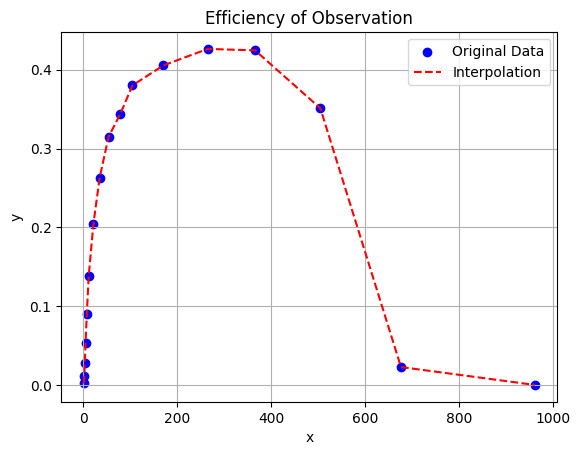

In [13]:
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'D:\Msc\Paper\Codes\plot-data.csv' # Update with the correct path if needed
plot_data = pd.read_csv(file_path)

# Assuming the CSV file has two columns: 'x' and 'y'
x_values = plot_data.iloc[:, 0]  # First column (index 0)
y_values = plot_data.iloc[:, 1]  # Second column (index 1)


# Create the interpolation function
interp_func = interp1d(x_values, y_values, kind='linear', fill_value="extrapolate")

# Test the interpolation function
test_x = [x_values.min() - 1, x_values.min(), (x_values.max() + x_values.min()) / 2, x_values.max(), x_values.max() + 1]
test_y = interp_func(test_x)

# Print the test results
#for x, y in zip(test_x, test_y):
#    print(f"Interpolated value at x={x}: y={y}")

# Plot the original data and the interpolation
plt.scatter(x_values, y_values, label='Original Data', color='blue')
plt.plot(x_values, interp_func(x_values), label='Interpolation', color='red', linestyle='--')
#plt.scatter(test_x, test_y, label='Test Points', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Efficiency of Observation')
plt.grid(True)
plt.show()


In [14]:
Data_path = 'D:\Msc\Paper\Codes\output2.txt'

file_path = 'D:\Msc\Paper\Codes\output2.txt'  # Replace with your .tex file path
with open(file_path, 'r') as file:
    lines = file.readlines()

# Prepare lists for columns
data = []
expected_columns = 49  # The number of columns expected
for line in lines:
    # Split each line into columns using spaces as delimiters
    row = line.strip().split()
    if len(row) == expected_columns:  # Only keep rows with the correct number of columns
        data.append(row)
    else:
        print(f"Row skipped due to mismatch: {row}")

# Specify column names
columns = ['V', 'B-V', 'U-B', 'V-I', 'V-K', 'mux', 'muy', 'HRV', 'UU', 'VV', 'WW',
           'Px', 'Mv', 'CL', 'Typ', 'Teff', 'logg', 'Pop', 'Age', 'Mass', 'Mbol',
           'Radius', '[M/H]', '[a/Fe]', 'longitude', 'latitude', 'RAJ2000', 'DECJ2000',
           'Dist', 'x_Gal', 'y_Gal', 'z_Gal', 'Av', 'errPx', 'errMux', 'errMuy', 'errHrv',
           'errMv', 'errMass', 'errAge', 'errTeff', 'errLogg', 'errMet', 'errAlphaFe',
           'errBand_V', 'errBand_B', 'errBand_U', 'errBand_I', 'errBand_K']

# Convert the data into a DataFrame
Bos_data = pd.DataFrame(data, columns=columns)

# Convert numeric columns to float where applicable
Bos_data = Bos_data.apply(pd.to_numeric, errors='ignore')
Bos_data

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Saeed\AppData\Local\Temp\ipykernel_11348\2784910301.py:1: SyntaxWarning: invalid escape sequence '\M'
  Data_path = 'D:\Msc\Paper\Codes\output2.txt'
C:\Users\Saeed\AppData\Local\Temp\ipykernel_11348\2784910301.py:3: SyntaxWarning: invalid escape sequence '\M'
  file_path = 'D:\Msc\Paper\Codes\output2.txt'  # Replace with your .tex file path


Row skipped due to mismatch: ['#', 'V', 'B-V', 'U-B', 'V-I', 'V-K', 'mux', 'muy', 'HRV', 'UU', 'VV', 'WW', 'Px', 'Mv', 'CL', 'Typ', 'Teff', 'logg', 'Pop', 'Age', 'Mass', 'Mbol', 'Radius', '[M/H]', '[a/Fe]', 'longitude', 'latitude', 'RAJ2000', 'DECJ2000', 'Dist', 'x_Gal', 'y_Gal', 'z_Gal', 'Av', 'errPx', 'errMux', 'errMuy', 'errHrv', 'errMv', 'errMass', 'errAge', 'errTeff', 'errLogg', 'errMet', 'errAlphaFe', 'errBand_V', 'errBand_B', 'errBand_U', 'errBand_I', 'errBand_K']


C:\Users\Saeed\AppData\Local\Temp\ipykernel_11348\2784910301.py:30: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  Bos_data = Bos_data.apply(pd.to_numeric, errors='ignore')


,V,B-V,U-B,V-I,V-K,mux,muy,HRV,UU,VV,...,errAge,errTeff,errLogg,errMet,errAlphaFe,errBand_V,errBand_B,errBand_U,errBand_I,errBand_K
0,10.863,1.266,1.322,1.503,3.158,7.991,-48.743,-23.74,-22.43,-6.19,...,0.1,50.0,0.1,0.1,0.02,0.0244,-0.0178,-0.0023,-0.0110,-0.0190
1,17.124,1.647,1.330,2.881,5.452,-20.871,-94.491,-27.73,-24.60,-19.83,...,0.1,50.0,0.1,0.1,0.02,-0.0009,-0.0208,-0.0306,0.0156,-0.0029
2,16.708,1.665,1.402,2.849,5.361,-31.997,-67.154,-72.97,-72.14,-16.64,...,0.1,50.0,0.1,0.1,0.02,-0.0239,-0.0349,0.0038,-0.0133,-0.0204
3,12.716,1.387,1.262,1.751,3.669,35.351,38.128,-38.75,-39.79,11.91,...,0.1,50.0,0.1,0.1,0.02,0.0085,-0.0171,0.0358,0.0323,0.0095
4,11.133,1.174,1.205,1.404,3.131,-2.443,0.014,-15.12,-13.16,-0.28,...,0.1,50.0,0.1,0.1,0.02,0.0411,-0.0068,-0.0078,-0.0296,-0.0293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97439,17.925,3.220,3.166,3.892,8.357,-3.565,-5.275,-1.79,7.58,-487.42,...,0.1,50.0,0.1,0.1,0.02,-0.0139,-0.0169,0.0318,-0.0178,0.0153
97440,17.620,3.123,3.053,3.667,7.830,-2.889,-6.312,4.73,13.12,-487.34,...,0.1,50.0,0.1,0.1,0.02,-0.0098,-0.0000,0.0048,-0.0044,-0.0042
97441,17.967,1.501,0.434,2.059,4.180,-2.411,-5.797,-8.65,-2.98,-487.79,...,0.1,50.0,0.1,0.1,0.02,0.0154,-0.0213,-0.0248,-0.0272,0.0355
97442,17.869,2.466,1.753,3.074,6.705,-3.405,-4.731,-21.80,-11.49,-498.67,...,0.1,50.0,0.1,0.1,0.02,0.0047,0.0173,0.0085,-0.0126,-0.0168


In [15]:
def ap_mag(M,d):
  ap_mag = M - 5 + (5* np.log10(d*1000))
  return ap_mag

In [17]:
from math import inf
c_1 = 9.3184e-27
M_sun = 1.99e30


Sim = pd.DataFrame(columns = [ "M_S","x_L", "x_S", "Mv_S","mv_S", "Mv_L", "V_L","V_L_x","V_L_y" ,"V_L_z", "d_L" ,"mv_L", "V_S" , "d_S" ,"V_S_x","V_S_y","V_S_z",
                              "W_L" , "W_S" ,"t_E", "Sepration" , 'eff_tE', 'eff_rand','vis'])
for i in range (1000):
  #print(i)

  M_S = random.choice(Bos_data['Mass'])

  Mv_S = random.choice(Bos_data['Mv'])

  d_s = sample_star()
  mv_S = ap_mag(Mv_S, d_s)

  #print('d_s is', d_s)
  x_s = 8.3 - d_s
  #print('x_s is', x_s)

  V_S = Velocity(x_s)
  #print('V_S is', V_S)

  # Total density function
  def rho(q, d_s):
    d_L = d_s * q
    x = 8.3 - d_L
    Density = (n_Bulge(x) + n_Disk(x)) * M_sun
    return Density

  # Probability density function dP/dq
  def dP_dq(q, d_s):
      return c_1 * q * (1 - q) * rho(q, d_s)

  # Sampling function using inverse transform sampling
  def select_L_star(d_s):
      # Define q range, ensuring q < 1
      q_values = np.linspace(0.01, 0.99, 1000)
      dP_values = dP_dq(q_values, d_s)

      # Normalize the distribution
      dP_values /= np.sum(dP_values)

      # Cumulative distribution function (CDF)
      cdf = np.cumsum(dP_values)

      # Generate a random value for inverse sampling
      random_value = np.random.random()
      #print('random_value is', random_value)

      # Find the corresponding q from the CDF
      selected_q = q_values[np.searchsorted(cdf, random_value)]
      #print('selected_q is', selected_q)
      selected_d_L = d_s * selected_q
      #print('selected_d_L is', selected_d_L)


      # Ensure d_L < d_s
      #if selected_d_L >= d_s:
      #    return select_L_star(d_s)  # Resample if the condition is violated
      return selected_d_L

  d_L = select_L_star(d_s)
  Mv_L = random.choice(Bos_data['Mv'])
  mv_L = ap_mag(Mv_L, d_L)

  #print('d_L is', d_L)
  x_L = 8.3 - d_L
  #print('x_L is', x_L)

  V_L = Velocity(x_L)
  #print('V_L is', V_L)

  W_L = (((V_L - V_E ) * 1000) / (d_L * 3.09 * 10**19)) * 3600 * 24 * 365
  W_S = (((V_S - V_E ) * 1000) / (d_s * 3.09 * 10**19)) * 3600 * 24 * 365

  def_W = W_L - W_S
  dew_W_value = np.linalg.norm(def_W)

  #print('def_W is', def_W)
  Sep = dew_W_value * 206265
  #print('Sep is', Sep)
  x = d_L / d_s
  def_V_L = np.linalg.norm(V_L - V_E )
  def_V_S = np.linalg.norm(V_S - V_E )

  t_E = abs(45.6 * (d_s/8.3)**0.5 * (M_S*2)**0.5 * ((1-x)/x)**0.5 * (((def_V_S )-((1/x)*(def_V_L )))/220)**-1)


  eff_tE = interp_func(t_E)
  eff_rand = random.random()
  eff_tE = interp_func(t_E)
  if t_E > 1000:
    eff_tE = 0
  if eff_rand < eff_tE:
    vis = 'yes'
  else:
    vis = 'no'

  data = {
      "M_S" : M_S,
      "x_L" : x_L,
      "x_S" : x_s,
      "Mv_S": Mv_S,

      "V_L": np.linalg.norm(V_L) ,
      "d_L": d_L,
      "V_L_x": V_L[0],
      "V_L_y": V_L[1],
      "V_L_z": V_L[2],

      "V_S": np.linalg.norm(V_S) ,
      "d_S": d_s,
      "V_S_x": V_S[0],
      "V_S_y": V_S[1],
      "V_S_z": V_S[2],
      "Mv_L": Mv_L,
      "mv_L": mv_L,
      "mv_S": mv_S,

      "W_L": np.linalg.norm(W_L) ,
      "W_S": np.linalg.norm(W_S) ,

      "t_E": t_E,
      'eff_tE':eff_tE,
      'eff_rand': eff_rand,
      'vis':vis,

      #'dew_W':dew_W,


      "Sepration": Sep
  }
  Sim.loc[i] = data
Sim




,M_S,x_L,x_S,Mv_S,mv_S,Mv_L,V_L,V_L_x,V_L_y,V_L_z,...,V_S_x,V_S_y,V_S_z,W_L,W_S,t_E,Sepration,eff_tE,eff_rand,vis
0,1.156,3.240119,1.108108,3.57,17.854216,1.83,210.439466,0.0,209.647733,18.237243,...,0.0,52.141685,19.596223,3.106914e-09,2.443284e-08,61.331774,0.004431,0.32320051981962034,0.962932,no
1,0.938,2.468142,1.181982,4.67,18.931795,0.92,229.349327,0.0,228.827867,15.457072,...,0.0,-15.610799,-23.784760,9.033415e-10,3.478965e-08,25.284432,0.007354,0.21945628722669688,0.096927,yes
2,1.449,5.213414,1.264064,0.75,14.986609,2.59,275.166510,0.0,275.166348,0.298230,...,0.0,58.609492,24.491133,1.738291e-08,2.407488e-08,385.527207,0.008518,0.4141962731800369,0.257596,yes
3,1.452,3.596919,0.008208,3.97,18.563242,4.02,236.357960,0.0,231.698726,46.698884,...,0.0,7.603040,6.352184,7.454190e-09,2.667232e-08,95.595543,0.006070,0.3668851417242037,0.594413,no
4,0.748,2.209597,0.492492,5.84,20.302562,3.19,209.265486,0.0,208.532002,17.505649,...,0.0,70.102004,10.939284,2.723304e-09,2.014507e-08,47.412109,0.003619,0.2965497625045877,0.157178,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.043,1.623582,0.238038,4.65,19.182204,0.78,71.893754,0.0,69.673538,-17.728790,...,0.0,-62.909285,-10.363096,2.408881e-08,3.646737e-08,66.527605,0.002649,0.32921828267022574,0.669447,no
996,1.153,6.350967,0.722322,5.14,19.537681,3.39,226.026290,0.0,225.941612,-6.186428,...,0.0,50.436547,-19.614553,1.018072e-08,2.381558e-08,244.342934,0.005153,0.4216510541562873,0.278449,yes
997,1.188,3.593272,0.886486,3.30,17.650120,0.95,256.067417,0.0,256.059579,-2.003530,...,0.0,60.320539,-1.693161,7.653115e-09,2.265271e-08,101.717469,0.006084,0.3754623545967809,0.376610,no
998,0.907,4.392184,0.582783,3.07,17.507304,2.49,239.322019,0.0,233.664496,51.729415,...,0.0,52.844544,-25.559145,1.036758e-08,2.323270e-08,132.230631,0.006058,0.3905276040859015,0.336906,yes


In [18]:
Sim.to_csv('D:\Msc\Paper\Codes\Simulations\Draft_sim.csv', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\Saeed\AppData\Local\Temp\ipykernel_11348\1249546425.py:1: SyntaxWarning: invalid escape sequence '\M'
  Sim.to_csv('D:\Msc\Paper\Codes\Simulations\Draft_sim.csv', index=False)


In [19]:
Sim = Sim[Sim['t_E'] <= 1000]
Sim

,M_S,x_L,x_S,Mv_S,mv_S,Mv_L,V_L,V_L_x,V_L_y,V_L_z,...,V_S_x,V_S_y,V_S_z,W_L,W_S,t_E,Sepration,eff_tE,eff_rand,vis
0,1.156,3.240119,1.108108,3.57,17.854216,1.83,210.439466,0.0,209.647733,18.237243,...,0.0,52.141685,19.596223,3.106914e-09,2.443284e-08,61.331774,0.004431,0.32320051981962034,0.962932,no
1,0.938,2.468142,1.181982,4.67,18.931795,0.92,229.349327,0.0,228.827867,15.457072,...,0.0,-15.610799,-23.784760,9.033415e-10,3.478965e-08,25.284432,0.007354,0.21945628722669688,0.096927,yes
2,1.449,5.213414,1.264064,0.75,14.986609,2.59,275.166510,0.0,275.166348,0.298230,...,0.0,58.609492,24.491133,1.738291e-08,2.407488e-08,385.527207,0.008518,0.4141962731800369,0.257596,yes
3,1.452,3.596919,0.008208,3.97,18.563242,4.02,236.357960,0.0,231.698726,46.698884,...,0.0,7.603040,6.352184,7.454190e-09,2.667232e-08,95.595543,0.006070,0.3668851417242037,0.594413,no
4,0.748,2.209597,0.492492,5.84,20.302562,3.19,209.265486,0.0,208.532002,17.505649,...,0.0,70.102004,10.939284,2.723304e-09,2.014507e-08,47.412109,0.003619,0.2965497625045877,0.157178,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.043,1.623582,0.238038,4.65,19.182204,0.78,71.893754,0.0,69.673538,-17.728790,...,0.0,-62.909285,-10.363096,2.408881e-08,3.646737e-08,66.527605,0.002649,0.32921828267022574,0.669447,no
996,1.153,6.350967,0.722322,5.14,19.537681,3.39,226.026290,0.0,225.941612,-6.186428,...,0.0,50.436547,-19.614553,1.018072e-08,2.381558e-08,244.342934,0.005153,0.4216510541562873,0.278449,yes
997,1.188,3.593272,0.886486,3.30,17.650120,0.95,256.067417,0.0,256.059579,-2.003530,...,0.0,60.320539,-1.693161,7.653115e-09,2.265271e-08,101.717469,0.006084,0.3754623545967809,0.376610,no
998,0.907,4.392184,0.582783,3.07,17.507304,2.49,239.322019,0.0,233.664496,51.729415,...,0.0,52.844544,-25.559145,1.036758e-08,2.323270e-08,132.230631,0.006058,0.3905276040859015,0.336906,yes


Text(0.5, 1.0, 't_E')

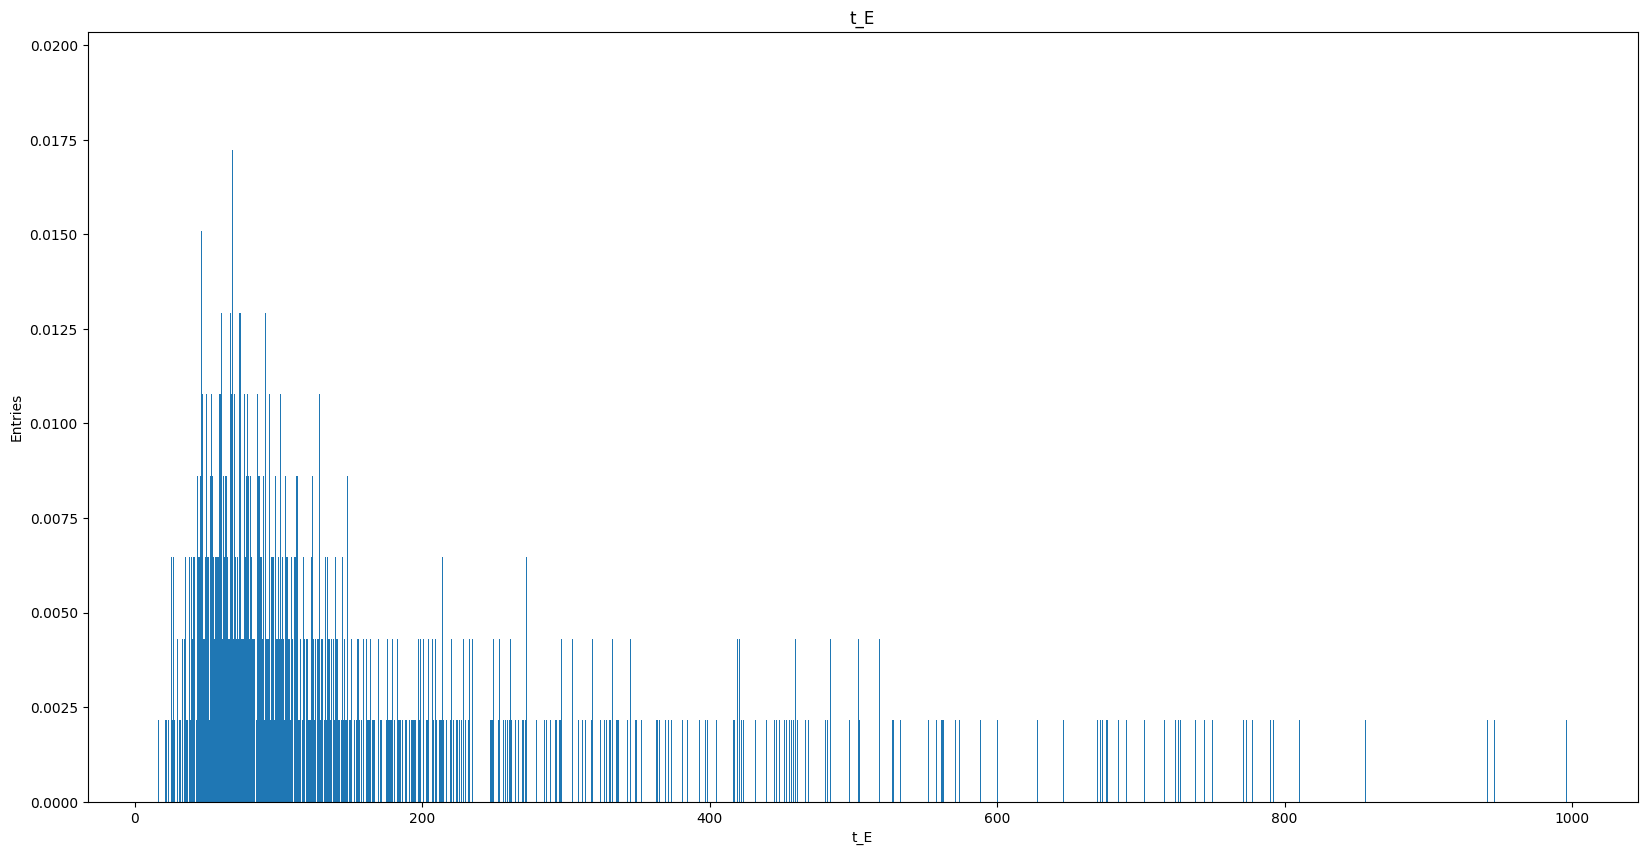

In [20]:
plt.figure(figsize=(20, 10))
plt.hist(Sim['t_E'] , bins=2000 , density = True)
plt.xlabel('t_E')
plt.ylabel('Entries')
plt.title('t_E')
#ax = plt.gca()
#ax.set_xlim([0, 100])

In [21]:
yes_Sim = Sim[Sim['vis'] == 'yes']
yes_Sim

,M_S,x_L,x_S,Mv_S,mv_S,Mv_L,V_L,V_L_x,V_L_y,V_L_z,...,V_S_x,V_S_y,V_S_z,W_L,W_S,t_E,Sepration,eff_tE,eff_rand,vis
1,0.938,2.468142,1.181982,4.67,18.931795,0.92,229.349327,0.0,228.827867,15.457072,...,0.0,-15.610799,-23.784760,9.033415e-10,3.478965e-08,25.284432,0.007354,0.21945628722669688,0.096927,yes
2,1.449,5.213414,1.264064,0.75,14.986609,2.59,275.166510,0.0,275.166348,0.298230,...,0.0,58.609492,24.491133,1.738291e-08,2.407488e-08,385.527207,0.008518,0.4141962731800369,0.257596,yes
4,0.748,2.209597,0.492492,5.84,20.302562,3.19,209.265486,0.0,208.532002,17.505649,...,0.0,70.102004,10.939284,2.723304e-09,2.014507e-08,47.412109,0.003619,0.2965497625045877,0.157178,yes
6,2.417,1.735407,1.067067,4.41,18.706572,3.66,63.712291,0.0,60.205574,20.845740,...,0.0,19.950999,-33.104856,2.552317e-08,2.955015e-08,230.201841,0.001734,0.41852414394888976,0.008985,yes
10,1.646,1.097490,0.303704,3.17,17.684444,5.99,68.490210,0.0,47.590872,49.254622,...,0.0,-18.037593,-16.408947,2.554152e-08,3.114657e-08,135.055647,0.002200,0.3916134841582043,0.284843,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.898,0.736636,0.082082,4.56,19.133809,3.19,11.106616,0.0,7.312760,-8.359454,...,0.0,23.299066,-3.635463,2.940973e-08,2.503666e-08,111.762988,0.000906,0.382660247395453,0.337108,yes
992,0.816,3.334693,2.158759,0.58,14.521281,3.94,221.172119,0.0,220.661755,15.016530,...,0.0,232.295714,25.025339,8.190057e-10,2.385017e-09,569.314381,0.000539,0.22842286844292664,0.173266,yes
994,1.343,1.907256,0.525325,4.63,19.083411,7.41,105.936754,0.0,102.998780,24.775937,...,0.0,36.374108,-40.932841,1.943727e-08,2.565826e-08,156.116330,0.002147,0.39970879360867195,0.391721,yes
996,1.153,6.350967,0.722322,5.14,19.537681,3.39,226.026290,0.0,225.941612,-6.186428,...,0.0,50.436547,-19.614553,1.018072e-08,2.381558e-08,244.342934,0.005153,0.4216510541562873,0.278449,yes


(0.0, 100.0)

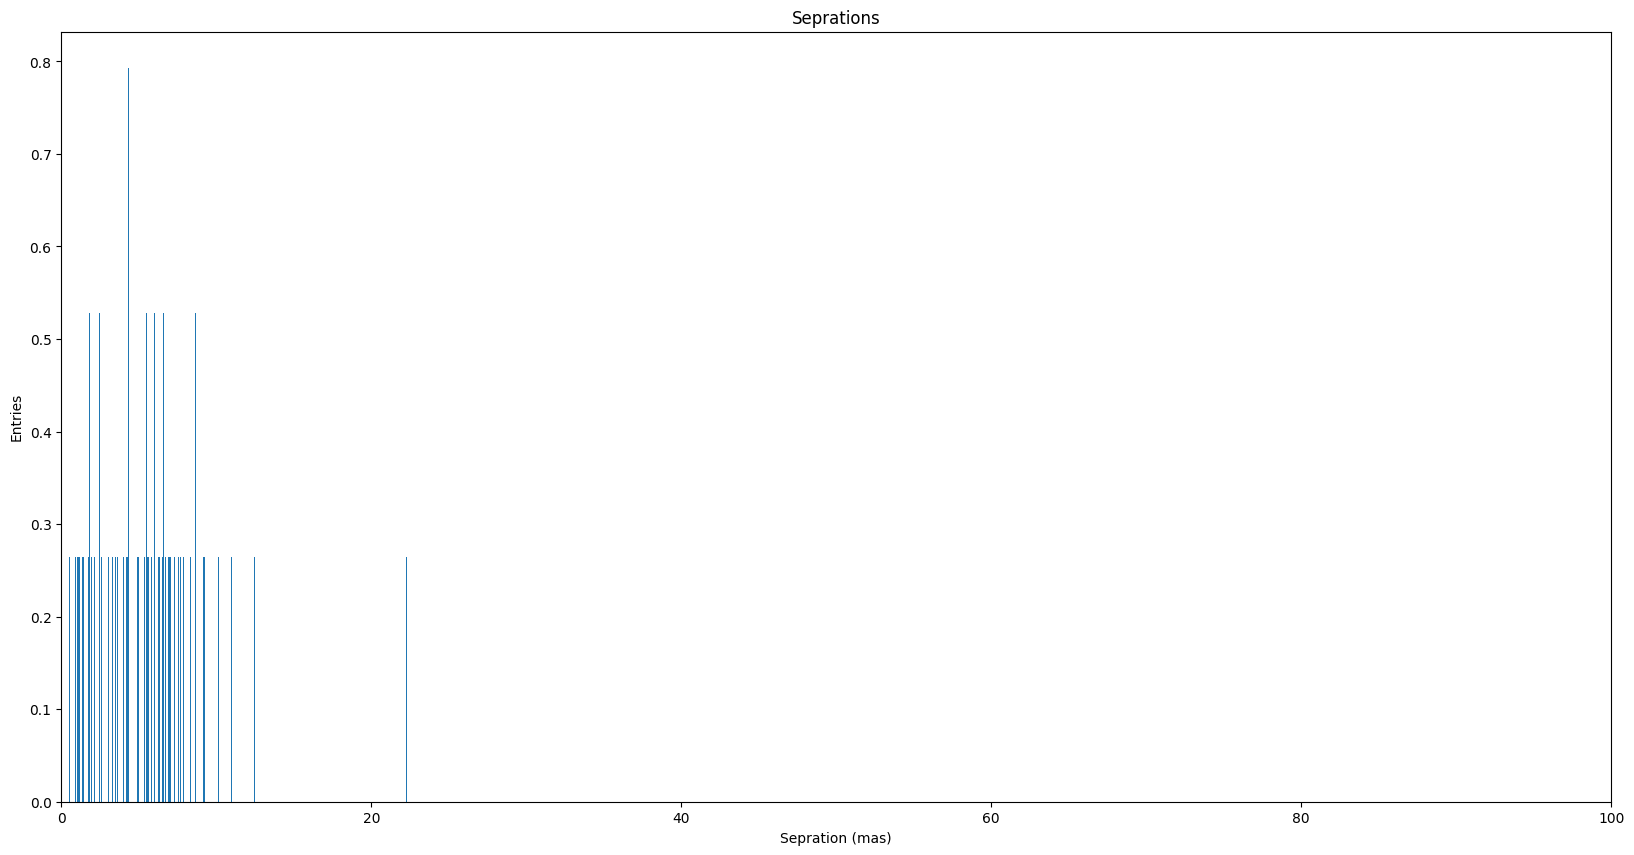

In [22]:
plt.figure(figsize=(20, 10))
plt.hist(yes_Sim['Sepration']*1000 , bins=2000 , density = True)
plt.xlabel('Sepration (mas)')
plt.ylabel('Entries')
plt.title('Seprations')
ax = plt.gca()
ax.set_xlim([0, 100])

(0.0, 100.0)

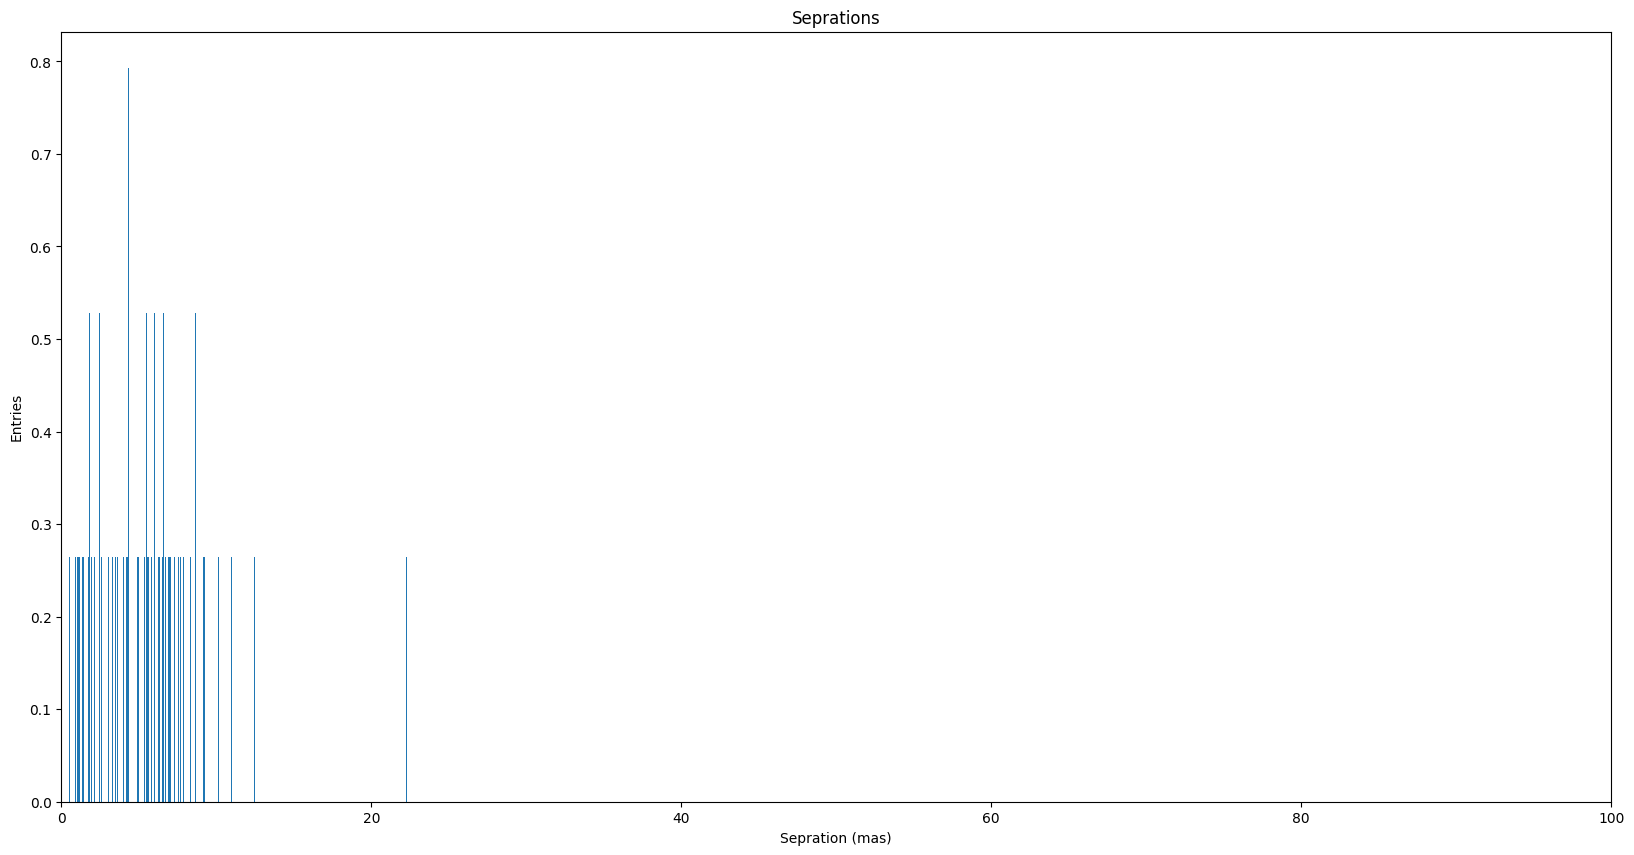

In [23]:
plt.figure(figsize=(20, 10))
plt.hist(yes_Sim['Sepration']*1000 , bins=2000 , density = True)
plt.xlabel('Sepration (mas)')
plt.ylabel('Entries')
plt.title('Seprations')
ax = plt.gca()
ax.set_xlim([0, 100])

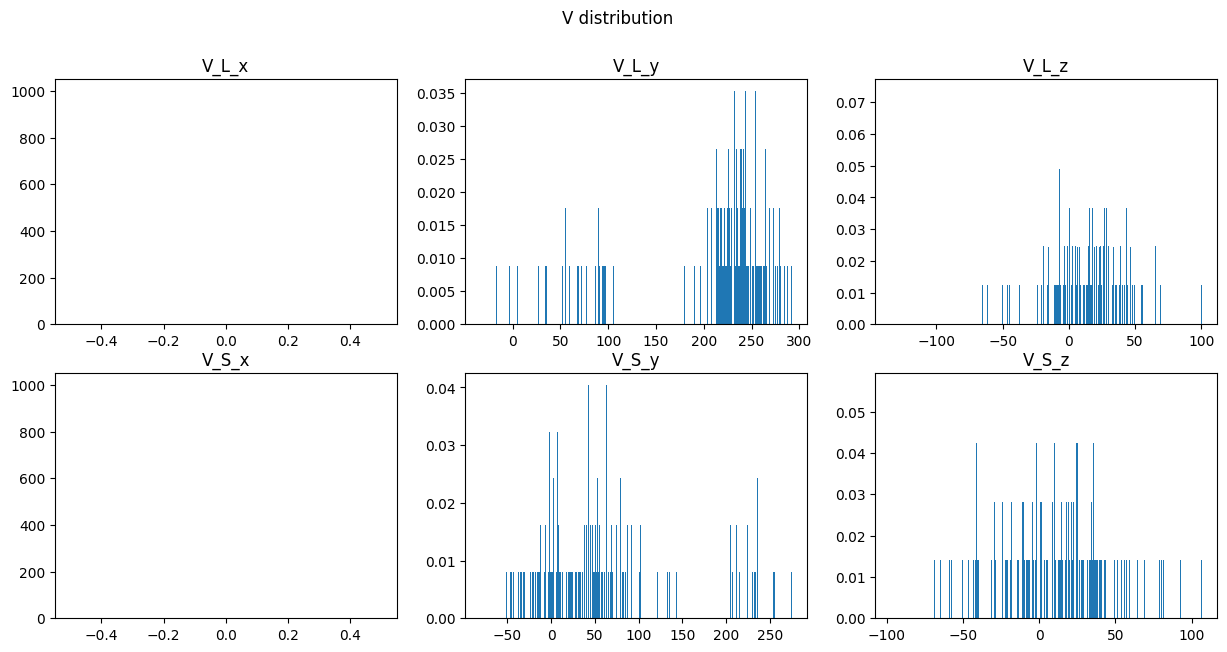

In [24]:

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15, 7))

axs[0,0].set_title('V_L_x')
axs[0,0].hist(yes_Sim['V_L_x'] , bins=1000 , density = True)

axs[0,1].set_title('V_L_y')
axs[0,1].hist(yes_Sim['V_L_y'] , bins=1000 , density = True)

axs[0,2].set_title('V_L_z')
axs[0,2].hist(yes_Sim['V_L_z'] , bins=1000 , density = True)

axs[1,0].set_title('V_S_x')
axs[1,0].hist(yes_Sim['V_S_x'] , bins=1000 , density = True)

axs[1,1].set_title('V_S_y')
axs[1,1].hist(yes_Sim['V_S_y'] , bins=1000 , density = True)

axs[1,2].set_title('V_S_z')
axs[1,2].hist(yes_Sim['V_S_z'] , bins=1000 , density = True)

fig.suptitle('V distribution')
plt.show()

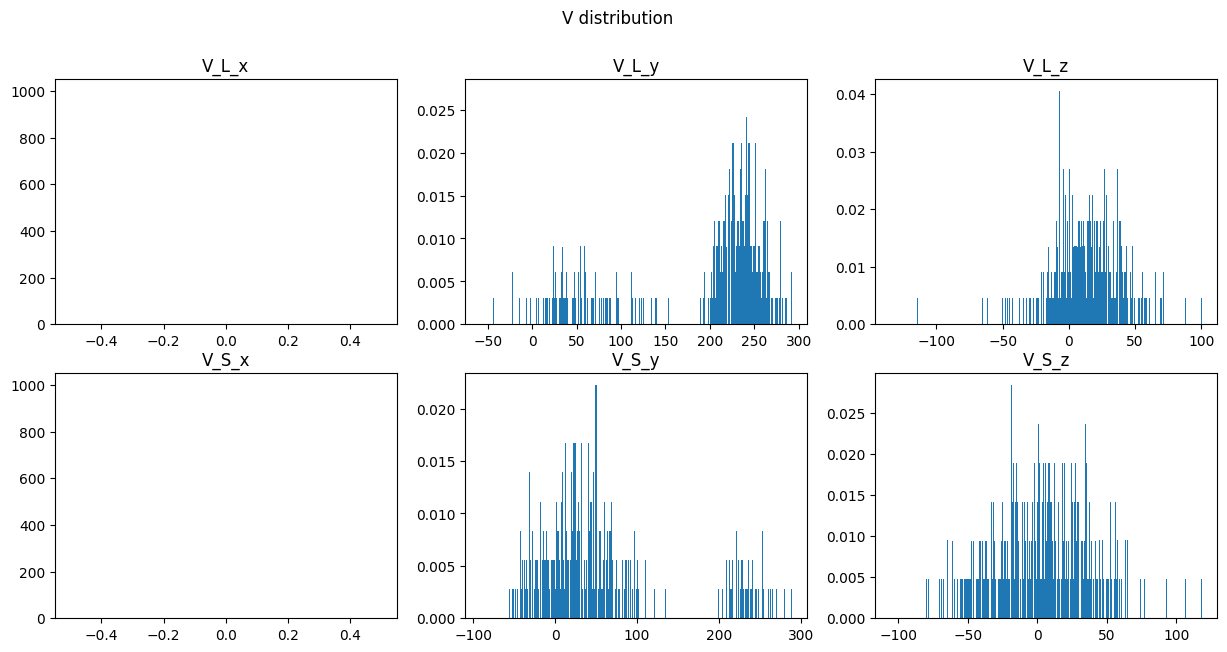

In [25]:

fig, axs = plt.subplots(nrows=2, ncols=3,figsize=(15, 7))

axs[0,0].set_title('V_L_x')
axs[0,0].hist(Sim['V_L_x'] , bins=1000 , density = True)

axs[0,1].set_title('V_L_y')
axs[0,1].hist(Sim['V_L_y'] , bins=1000 , density = True)

axs[0,2].set_title('V_L_z')
axs[0,2].hist(Sim['V_L_z'] , bins=1000 , density = True)

axs[1,0].set_title('V_S_x')
axs[1,0].hist(Sim['V_S_x'] , bins=1000 , density = True)

axs[1,1].set_title('V_S_y')
axs[1,1].hist(Sim['V_S_y'] , bins=1000 , density = True)

axs[1,2].set_title('V_S_z')
axs[1,2].hist(Sim['V_S_z'] , bins=1000 , density = True)

fig.suptitle('V distribution')
plt.show()

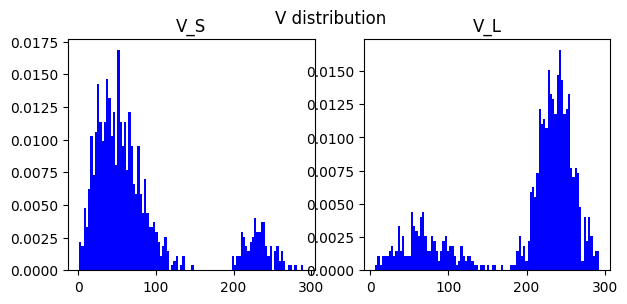

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(7,3))
axs[0].set_title('V_S')
axs[0].hist(Sim['V_S'] , label='***', color='blue', bins = 100 , density=True)

axs[1].set_title('V_L')
axs[1].hist(Sim['V_L'] , label='***', color='blue', bins = 100 , density=True)

fig.suptitle('V distribution')
plt.show()

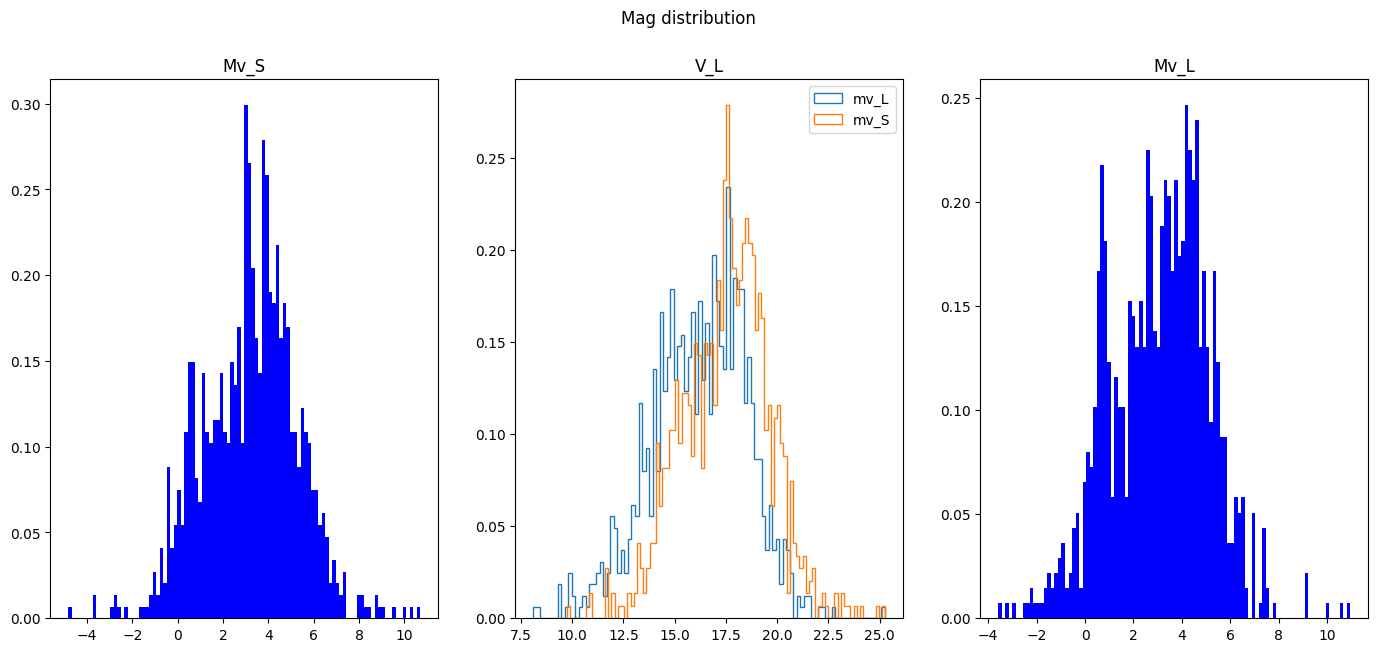

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(17,7))

axs[0].set_title('Mv_S')
axs[0].hist(Sim['Mv_S'] , label='Mv_S', color='blue', bins = 100 , density=True)

axs[1].set_title('V_L')
axs[1].hist(Sim['mv_L'] , label='mv_L', bins = 100 , density=True, histtype='step', linestyle='-',linewidth=1)
axs[1].hist(Sim['mv_S'] , label='mv_S', bins = 100 , density=True, histtype='step', linestyle='-',linewidth=1)
axs[1].legend(fontsize=10)

axs[2].set_title('Mv_L')
axs[2].hist(Sim['Mv_L'] , label='Mv_L', color='blue', bins = 100 , density=True)


fig.suptitle('Mag distribution')
plt.show()

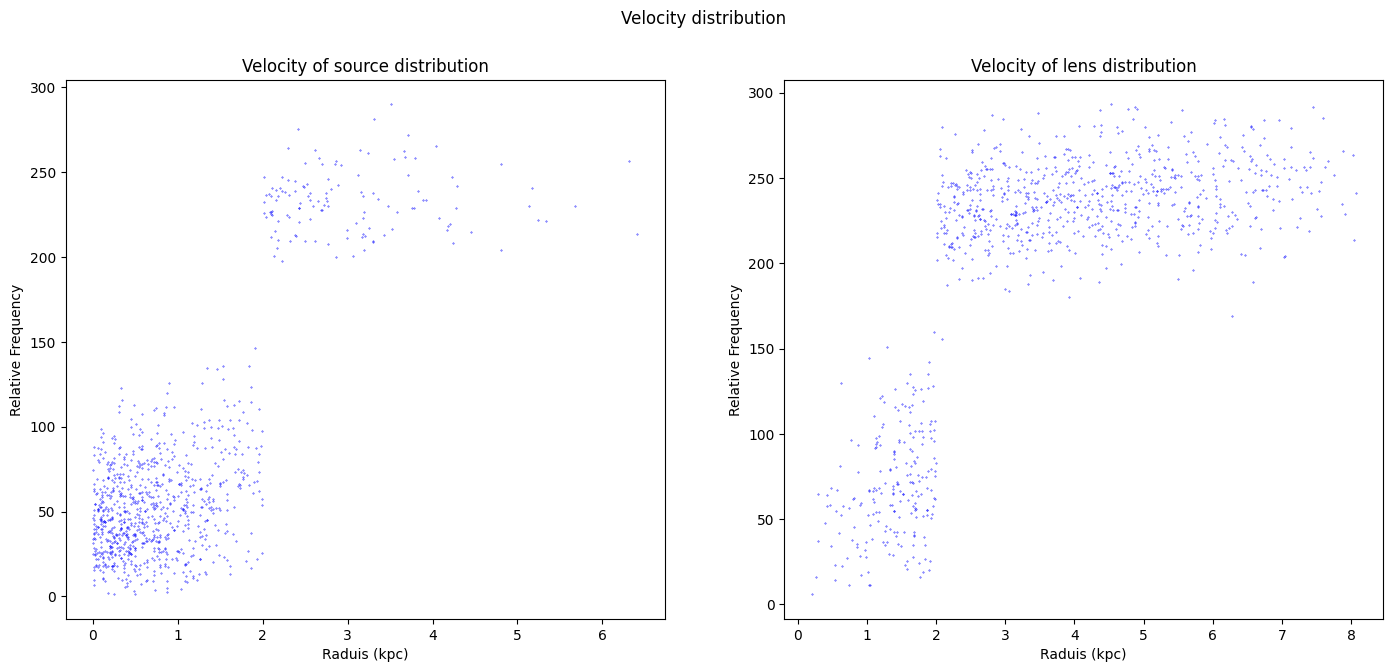

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(17,7))


axs[0].set_title('Velocity of source distribution')
axs[0].scatter(Sim['x_S'], Sim['V_S'] , color='blue' , s =0.1)
axs[0].set_ylabel('Relative Frequency', fontsize=10)
axs[0].set_xlabel('Raduis (kpc)', fontsize=10)


axs[1].set_title('Velocity of lens distribution')
axs[1].scatter(Sim['x_L'], Sim['V_L'] , color='blue' , s =0.1)
axs[1].set_ylabel('Relative Frequency', fontsize=10)
axs[1].set_xlabel('Raduis (kpc)', fontsize=10)

fig.suptitle('Velocity distribution')
plt.show()


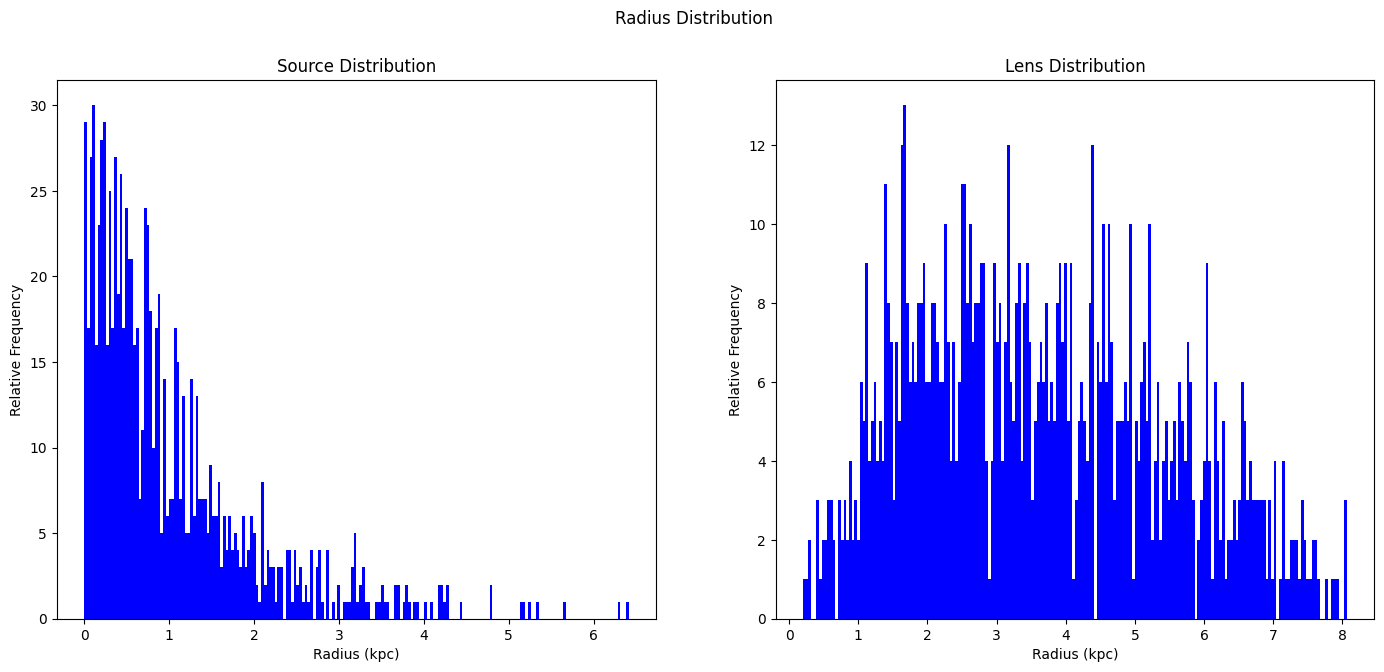

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(17,7))


axs[0].set_title('Source Distribution')
axs[0].hist(Sim['x_S'], color='blue' , bins= 200)
axs[0].set_ylabel('Relative Frequency', fontsize=10)
axs[0].set_xlabel('Radius (kpc)', fontsize=10)


axs[1].set_title('Lens Distribution')
axs[1].hist(Sim['x_L'], color='blue' , bins= 200)
axs[1].set_ylabel('Relative Frequency', fontsize=10)
axs[1].set_xlabel('Radius (kpc)', fontsize=10)

fig.suptitle('Radius Distribution')
plt.show()


In [30]:
for i in range (1,11):
    dummy_df = yes_Sim[(yes_Sim['Sepration']*1000 > 10*i)&
     (yes_Sim['mv_L']<20)&
      (yes_Sim['mv_S']<20)]
    print (10*i, dummy_df.shape[0]/Sim.shape[0]*100, '%', )

print(max(yes_Sim['Sepration']*1000))

10 0.9503695881731784 %
20 0.21119324181626187 %
30 0.0 %
40 0.0 %
50 0.0 %
60 0.0 %
70 0.0 %
80 0.0 %
90 0.0 %
100 0.0 %
22.283020039297718


In [31]:
Lens_df = pd.DataFrame(Lens, columns=['Selected Radius'])

# Plotting the results
plt.figure(figsize=(10, 6))
plt.hist(Lens_df['Selected Radius'], bins=100, density=True, alpha=0.7)
plt.xlabel('Selected Star Radius (kpc)')
plt.ylabel('Density')
plt.title('Distribution of Selected Star Radii')
plt.show()

NameError: name 'Lens' is not defined